<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.random as rnd
np.random.normal(loc=5, scale=2, size=10)
#(mean, std, number of values)

array([8.18774823, 4.22328566, 7.26784899, 7.36768437, 6.64548995,
       3.62546251, 8.56268212, 6.09846044, 4.71996745, 2.94464904])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

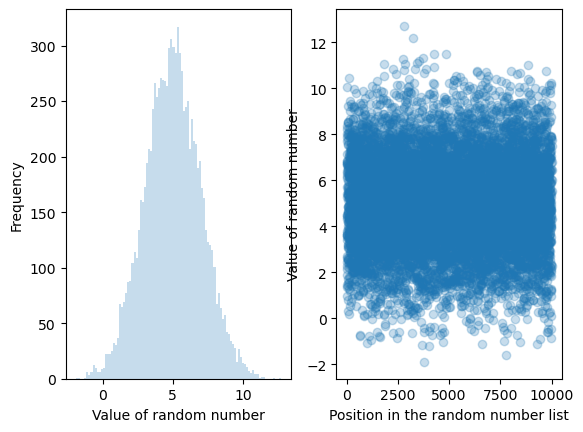

In [5]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [6]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)
#mask picks out the range of numbers that is between 3 and 7,
#'&' is intercept 
print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')


% of points between 1 std.dev. from the mean: 68.60%


## 1 Brownian Motion in 1D

### 1.1 The scenario

### 1.2 The simulation

In [45]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x


Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

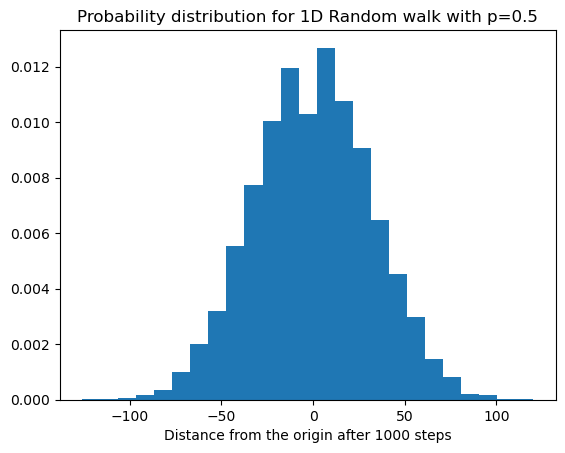

In [42]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

In [43]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

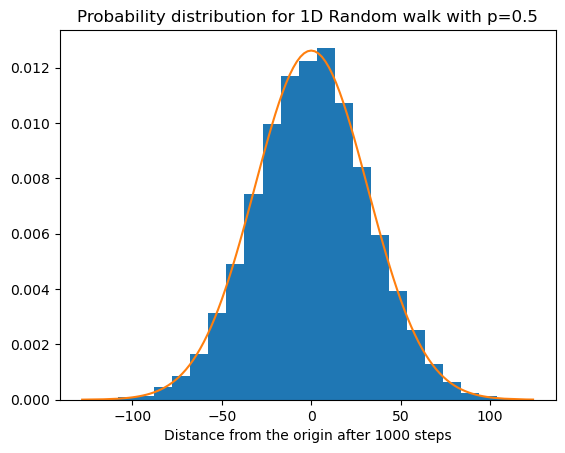

In [51]:
no_of_steps, p = 1_000, .5
prob_right=p
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]
#variables cannot be defined in an input,, must declare it outside

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')


prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

In [ ]:

# Your code here


### 2.2 A poor but intuitive solution

In [52]:
N_total = 100_000          #total grains thrown 
N_green = 0                #grains land on circular green area 

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1) #rnd.uniform drawing (1) samples from a uniform distribution
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin (radius)

    if r <= 1:                  #if radius is less than 1,
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # else, Estimate for pi

3.13672

### 2.3 A better solution

In [54]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

#4 * (N_green / N_total)

print(x)

[-0.88807594  0.91846865  0.52993153 ...  0.1952361  -0.0403751
  0.3232599 ]


### 2.4 A smarter solution

In [55]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.143704

## Exercise 1 :  Vital Stats of Random π

In [6]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)             
    return 4 * (N_green /n)

ferret = [estimate_pi(100000) for _ in range(100)]
print(f'the mean is {np.mean(ferret):.4f}, the standard deviation {np.std(ferret):.4f}.')

the mean is 3.1406, the standard deviation 0.0050.


In [48]:
boo = []
m_values = []
std_values =[]
nn=10
for i in range(1,6):
    n = nn**(i)
    boo.append(n)
for r in boo:
    pi_values = [estimate_pi(r) for _ in range(100)]
    m_values.append(np.mean(pi_values))
    std_values.append(np.std(pi_values))

In [38]:
print(np.pi)

3.141592653589793


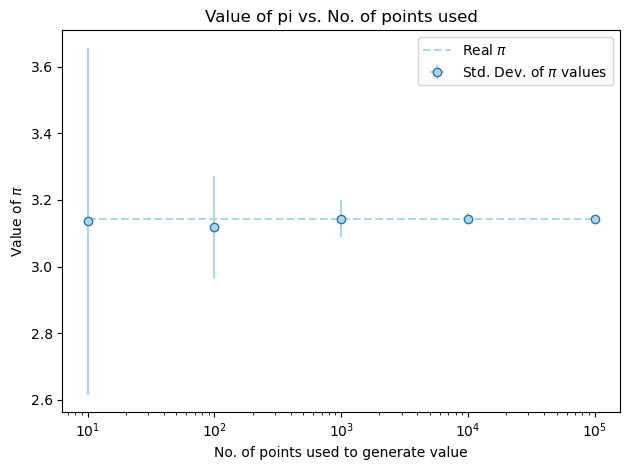

In [47]:
p = np.pi
plt.errorbar(boo, m_values, xerr=0, yerr=std_values, markerfacecolor='lightblue',
             ecolor='lightblue', fmt='o',
             label='Std. Dev. of $\pi$ values')
plt.plot(boo, [p for _ in boo], color='lightblue', linestyle='dashed', label='Real $\pi$')
plt.xscale('log')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of $\pi$')
plt.title('Value of pi vs. No. of points used')
plt.legend(loc='upper right')

plt.tight_layout()